# Idősorelemzés Pythonban

# Szükséges függvények

In [2]:
# Excel fájl beolvasása
xl_file = pd.ExcelFile('fajl_nev.xlsx')
train = xl_file.parse(xl_file.sheet_names[0])

# CSV fájl beolvasása
pd.read_csv('fajl_nev', sep=',')

# Típus konverziók
## Numerikus konverzió
df = df.convert_objects(convert_numeric=True)
## Dátum konverzió
pd.to_datetime(df.valtozo_nev)
## Kategóriaváltozók konverziója numerikussá
pd.Categorical(df.valtozo_nev).codes

# Series értékek eltolása
df.valtozo_nev.shift()

# Hiányzó értékek 
## Ellenőrzése
pd.isnull(df).sum()
## Eldobása
df.valtozo_nev.dropna()
## Pótlása
### fix értékkel
df.valtozo_nev.fillna()
### utolsó értékkel
df.valtozo_nev.ffill()
### lineáris interpolációval
df.valtozo_nev.interpolate()

# Táblák összekapcsolása (join)
pd.merge(df1, df2, on='valtozo_nev', how = 'inner')

# Modell tanítása
## Inicializálás
regr = linear_model.LinearRegression()
regr = regr.fit(train_set, target)
## Predikciók kiadása
p = regr.predict(validation_set)

# Normalizálás
from sklearn import preprocassing as pp
scaler = pp.StandardScaler().fit(df)
df = pd.DataFrame(scaler.transform(df),columns=df.columns)

IOError: [Errno 2] No such file or directory: 'fajl_nev.xlsx'

# Data Understanding

In [ ]:
'''Importok'''
import pandas as pd
import numpy as np
from sklearn import *

In [12]:
df = pd.read_csv('power_train.csv')
df.dtypes
df.head()

Date day_type  school_holiday  winter        volume
0  2011-04-01       WE               0       0  94050.961926
1  2011-04-02       SA               0       0  76368.868300
2  2011-04-03       SU               0       0  70709.330940
3  2011-04-04       WE               0       0  94692.896258
4  2011-04-05       WE               0       0  96293.061267

# Data Preparation

# Modelling

# Evaluation

Első modell: 
16.6386346509


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


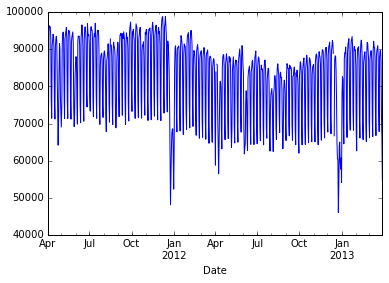

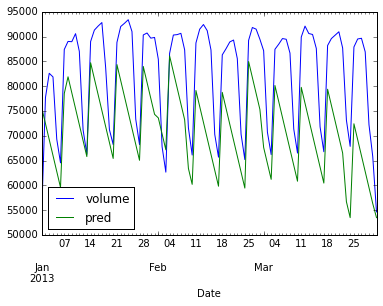

In [10]:
%matplotlib inline
# Module imports
import pandas as pd
import numpy as np


# Read CSV
df = pd.read_csv('power_train.csv')


# Set date as index
df.index = pd.to_datetime(df.Date)


# Generate date related attributes
df['month'] = df.index.map(lambda x: x.month)
df['dow'] = df.index.map(lambda x: x.dayofweek)
df['doy'] = df.index.map(lambda x: x.dayofyear)
df['day'] = df.index.map(lambda x: x.day)
df['woy'] = df.index.map(lambda x: x.weekofyear)
df['yr'] = df.index.map(lambda x: x.year)

i = 'yr'
df[[i,'volume']].groupby([i]).mean()#.plot()

df.volume.plot()

''' Hiányzó értékek kezelése '''
#Hiányzó célváltozójú sorok eldobása
df = df[df.volume.notnull()]

#Hiányzó értékek pótlása
df['winter'] = df.winter.ffill()


del df['day_type']
del df['Date']


# Kapcsolat a célváltozóval
df.corr()['volume']

# Validating intervals   

''' Train - test szétvágása '''
start = '2013-01-01'

d = df.copy()
train = d[d.index < start]
# Define validation set
val   = d[start:]

y = val.volume


from sklearn import linear_model, metrics, ensemble, grid_search

''' Lineáris regresszió tanítása '''
regr = linear_model.LinearRegression()
#regr = ensemble.GradientBoostingRegressor()
regr = regr.fit(train[train.columns-['volume']], train.volume)
p = regr.predict(val[val.columns-['volume']])

metrics.mean_squared_error(y,p)
metrics.mean_absolute_error(y,p)

print "Első modell: "

# Normalized Mean Absolute Error
mape  = lambda x, y: np.abs((y-x)/y).mean()
out =  mape(y,p)*100
print(out)
val['pred'] = p
val[['volume','pred']].plot()

Adjuk hozzá a kategóriaváltozót: day_type (integer konverzióval): 
14.3394549358


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


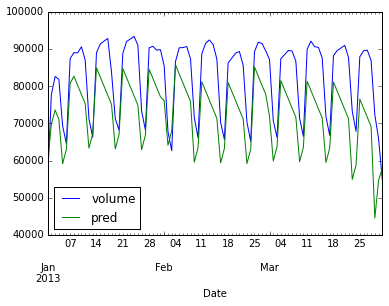

In [11]:

# Module imports
import pandas as pd
import numpy as np


# Read CSV
df = pd.read_csv('power_train.csv')



# Set date as index
df.index = pd.to_datetime(df.Date)


# Generate date related attributes
df['month'] = df.index.map(lambda x: x.month)
df['dow'] = df.index.map(lambda x: x.dayofweek)
df['doy'] = df.index.map(lambda x: x.dayofyear)
df['day'] = df.index.map(lambda x: x.day)
df['woy'] = df.index.map(lambda x: x.weekofyear)
df['yr'] = df.index.map(lambda x: x.year)



''' Hiányzó értékek kezelése '''
#Hiányzó célváltozójú sorok eldobása
df = df[df.volume.notnull()]

#Hiányzó értékek pótlása
df['winter'] = df.winter.ffill()

print "Adjuk hozzá a kategóriaváltozót: day_type (integer konverzióval): "
# Recode nominal
df['cday_type'] = pd.Categorical(df.day_type).codes


del df['day_type']
del df['Date']


# Kapcsolat a célváltozóval
df.corr()['volume']

# Validating intervals   

''' Train - test szétvágása '''
start = '2013-01-01'

d = df.copy()
train = d[d.index < start]
# Define validation set
val   = d[start:]

y = val.volume


from sklearn import linear_model, metrics, ensemble, grid_search

''' Lineáris regresszió tanítása '''
regr = linear_model.LinearRegression()
#regr = ensemble.GradientBoostingRegressor()
regr = regr.fit(train[train.columns-['volume']], train.volume)
p = regr.predict(val[val.columns-['volume']])

metrics.mean_squared_error(y,p)
metrics.mean_absolute_error(y,p)


# Normalized Mean Absolute Error
mape  = lambda x, y: np.abs((y-x)/y).mean()
print mape(y,p)*100

val['pred'] = p
val[['volume','pred']].plot()

Bővítsük az időjárási adatokkal: 
14.0096210471


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


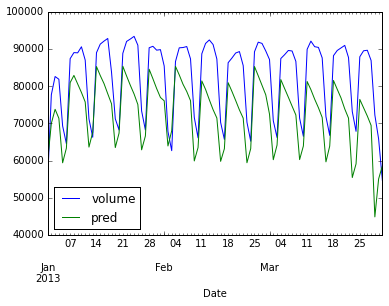

In [3]:

# Module imports
import pandas as pd
import numpy as np


# Read CSV
df = pd.read_csv('power_train.csv')

print "Bővítsük az időjárási adatokkal: "

# Read Excel
xl_file = pd.ExcelFile('weather.xlsx')
dfw = xl_file.parse(xl_file.sheet_names[0])#.set_index('Date') 

# Set date as index
df.index = pd.to_datetime(df.Date)
dfw.index = pd.to_datetime(dfw.Date)

# Merge datasets
df = pd.merge(df, dfw[dfw.columns-['Date']], left_index = True, right_index = True, how = 'inner')


# Generate date related attributes
df['month'] = df.index.map(lambda x: x.month)
df['dow'] = df.index.map(lambda x: x.dayofweek)
df['doy'] = df.index.map(lambda x: x.dayofyear)
df['day'] = df.index.map(lambda x: x.day)
df['woy'] = df.index.map(lambda x: x.weekofyear)
df['yr'] = df.index.map(lambda x: x.year)



''' Hiányzó értékek kezelése '''
#Hiányzó célváltozójú sorok eldobása
df = df[df.volume.notnull()]

#Hiányzó értékek pótlása
df['winter'] = df.winter.ffill()
df['Solar_Rad'] = df.Solar_Rad.interpolate()
df['Precip_Amt'] = df.Precip_Amt.fillna(0)

# Recode nominal
df['cday_type'] = pd.Categorical(df.day_type).codes

del df['day_type']
del df['Date']

# Validating intervals   

''' Train - test szétvágása '''
start = '2013-01-01'

d = df.copy()
train = d[d.index < start]
# Define validation set
val   = d[start:]

y = val.volume

from sklearn import linear_model, metrics, ensemble, grid_search

''' Lineáris regresszió tanítása '''
regr = linear_model.LinearRegression()
#regr = ensemble.GradientBoostingRegressor()
regr = regr.fit(train[train.columns-['volume']], train.volume)
p = regr.predict(val[val.columns-['volume']])

metrics.mean_squared_error(y,p)
metrics.mean_absolute_error(y,p)


# Normalized Mean Absolute Error
mape  = lambda x, y: np.abs((y-x)/y).mean()
out = mape(y,p)*100
print out
val['pred'] = p
val[['volume','pred']].plot()

Hagyjuk el a 2011-es évet: 
5.49784246549


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


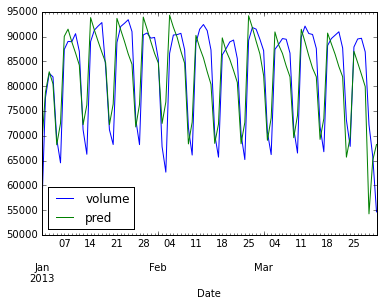

In [4]:

# Module imports
import pandas as pd
import numpy as np


# Read CSV
df = pd.read_csv('power_train.csv')


# Read Excel
xl_file = pd.ExcelFile('weather.xlsx')
dfw = xl_file.parse(xl_file.sheet_names[0])#.set_index('Date') 

# Set date as index
df.index = pd.to_datetime(df.Date)
dfw.index = pd.to_datetime(dfw.Date)

# Merge datasets
df = pd.merge(df, dfw[dfw.columns-['Date']], left_index = True, right_index = True, how = 'inner')


# Generate date related attributes
df['month'] = df.index.map(lambda x: x.month)
df['dow'] = df.index.map(lambda x: x.dayofweek)
df['doy'] = df.index.map(lambda x: x.dayofyear)
df['day'] = df.index.map(lambda x: x.day)
df['woy'] = df.index.map(lambda x: x.weekofyear)
df['yr'] = df.index.map(lambda x: x.year)



''' Hiányzó értékek kezelése '''
#Hiányzó célváltozójú sorok eldobása
df = df[df.volume.notnull()]

#Hiányzó értékek pótlása
df['winter'] = df.winter.ffill()
df['Solar_Rad'] = df.Solar_Rad.interpolate()
df['Precip_Amt'] = df.Precip_Amt.fillna(0)

# Recode nominal
df['cday_type'] = pd.Categorical(df.day_type).codes #mit csinál?

del df['day_type']
del df['Date']

# Validating intervals   

''' Train - test szétvágása '''
start = '2013-01-01'


print "Hagyjuk el a 2011-es évet: "
d = df[df['yr']!=2011]
train = d[d.index < start]
# Define validation set
val   = d[start:]

y = val.volume

from sklearn import linear_model, metrics, ensemble, grid_search

''' Lineáris regresszió tanítása '''
regr = linear_model.LinearRegression()
#regr = ensemble.GradientBoostingRegressor()
regr = regr.fit(train[train.columns-['volume']], train.volume)
p = regr.predict(val[val.columns-['volume']])

metrics.mean_squared_error(y,p)
metrics.mean_absolute_error(y,p)


# Normalized Mean Absolute Error
mape  = lambda x, y: np.abs((y-x)/y).mean()
out = mape(y,p)*100

print out

val['pred'] = p
val[['volume','pred']].plot()

Időben eltolt változók hozzáadása:
4.31517873126


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


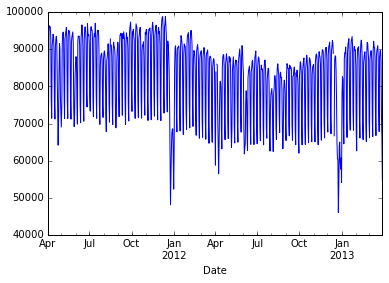

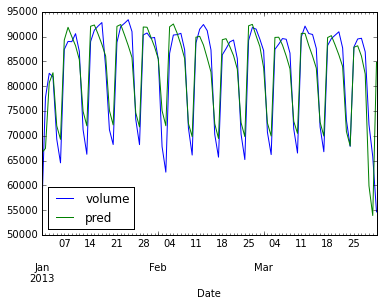

In [5]:

# Module imports
import pandas as pd
import numpy as np


# Read CSV
df = pd.read_csv('power_train.csv')

# Read Excel
xl_file = pd.ExcelFile('weather.xlsx')
dfw = xl_file.parse(xl_file.sheet_names[0])#.set_index('Date') 

# Set date as index
df.index = pd.to_datetime(df.Date)
dfw.index = pd.to_datetime(dfw.Date)

# Merge datasets
df = pd.merge(df, dfw[dfw.columns-['Date']], left_index = True, right_index = True, how = 'inner')



# Generate date related attributes
df['month'] = df.index.map(lambda x: x.month)
df['dow'] = df.index.map(lambda x: x.dayofweek)
df['doy'] = df.index.map(lambda x: x.dayofyear)
df['day'] = df.index.map(lambda x: x.day)
df['woy'] = df.index.map(lambda x: x.weekofyear)
df['yr'] = df.index.map(lambda x: x.year)

i = 'yr'
df[[i,'volume']].groupby([i]).mean()#.plot()

df.volume.plot()

''' Hiányzó értékek kezelése '''
#Hiányzó célváltozójú sorok eldobása
df = df[df.volume.notnull()]

#Hiányzó értékek pótlása
df['winter'] = df.winter.ffill()
df['Solar_Rad'] = df.Solar_Rad.interpolate()
df['Precip_Amt'] = df.Precip_Amt.fillna(0)

# Recode nominal
df['cday_type'] = pd.Categorical(df.day_type).codes

print "Időben eltolt változók hozzáadása:"

# Data engineering
df['pday_type'] = df.cday_type.shift().fillna(99) 
df['nday_type'] = df.cday_type.shift(-1).fillna(99)

    
del df['day_type']
del df['Date']


# Kapcsolat a célváltozóval
df.corr()['volume']

# Validating intervals   

''' Train - test szétvágása '''
start = '2013-01-01'

d = df[df['yr']!=2011]
train = d[d.index < start]
# Define validation set
val   = d[start:]

y = val.volume

from sklearn import linear_model, metrics, ensemble, grid_search

''' Lineáris regresszió tanítása '''
regr = linear_model.LinearRegression()
#regr = ensemble.GradientBoostingRegressor()
regr = regr.fit(train[train.columns-['volume']], train.volume)
p = regr.predict(val[val.columns-['volume']])

metrics.mean_squared_error(y,p)
metrics.mean_absolute_error(y,p)


# Normalized Mean Absolute Error
mape  = lambda x, y: np.abs((y-x)/y).mean()
out = mape(y,p)*100
print out
val['pred'] = p
val[['volume','pred']].plot()

Adjuk hozzá a kategóriaváltozót: day_type (dummy konverzióval): 
2.11529607439


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


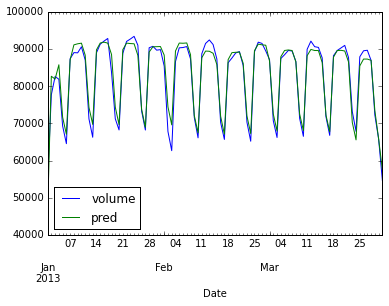

In [6]:

# Module imports
import pandas as pd
import numpy as np


# Read CSV
df = pd.read_csv('power_train.csv')

# Read Excel
xl_file = pd.ExcelFile('weather.xlsx')
dfw = xl_file.parse(xl_file.sheet_names[0])#.set_index('Date') 

# Set date as index
df.index = pd.to_datetime(df.Date)
dfw.index = pd.to_datetime(dfw.Date)

# Merge datasets
df = pd.merge(df, dfw[dfw.columns-['Date']], left_index = True, right_index = True, how = 'inner')

# Resmaple by month
temp = df.resample('1M')

from sklearn import preprocessing as pp
scaler = pp.StandardScaler().fit(temp)
temp = pd.DataFrame(scaler.transform(temp),columns=temp.columns)
#temp[['Solar_Rad','volume']].plot()


# Generate date related attributes
df['month'] = df.index.map(lambda x: x.month)
df['dow'] = df.index.map(lambda x: x.dayofweek)
df['doy'] = df.index.map(lambda x: x.dayofyear)
df['day'] = df.index.map(lambda x: x.day)
df['woy'] = df.index.map(lambda x: x.weekofyear)
df['yr'] = df.index.map(lambda x: x.year)

i = 'yr'
df[[i,'volume']].groupby([i]).mean()#.plot()



''' Hiányzó értékek kezelése '''
#Hiányzó célváltozójú sorok eldobása
df = df[df.volume.notnull()]

#Hiányzó értékek pótlása
df['winter'] = df.winter.ffill()
df['Solar_Rad'] = df.Solar_Rad.interpolate()
df['Precip_Amt'] = df.Precip_Amt.fillna(0)

# Recode nominal
df['cday_type'] = pd.Categorical(df.day_type).codes

for i in df.day_type.unique():
    df['day_'+i.lower()] = df.day_type.apply(lambda x: (x==i)+0)
    
# Data engineering
df['pday_type'] = df.day_type.shift().fillna(99) 
df['nday_type'] = df.day_type.shift(-1).fillna(99)

print "Adjuk hozzá a kategóriaváltozót: day_type (dummy konverzióval): "

for i in df.pday_type.unique():
    df['pday_'+str(i).lower()] = df.pday_type.apply(lambda x: (x==i)+0)

for i in df.nday_type.unique():
    df['nday_'+str(i).lower()] = df.nday_type.apply(lambda x: (x==i)+0)
    
del df['cday_type']
del df['pday_type']
del df['nday_type']
del df['day_type']
del df['Date']


# Kapcsolat a célváltozóval
df.corr()['volume']

# Validating intervals   

''' Train - test szétvágása '''
start = '2013-01-01'

d = df[df['yr']!=2011]
train = d[d.index < start]
# Define validation set
val   = d[start:]

y = val.volume

from sklearn import linear_model, metrics, ensemble, grid_search

''' Lineáris regresszió tanítása '''
regr = linear_model.LinearRegression()
#regr = ensemble.GradientBoostingRegressor()
regr = regr.fit(train[train.columns-['volume']], train.volume)
p = regr.predict(val[val.columns-['volume']])

metrics.mean_squared_error(y,p)
metrics.mean_absolute_error(y,p)


# Normalized Mean Absolute Error
mape  = lambda x, y: np.abs((y-x)/y).mean()
out = mape(y,p)*100
print out

val['pred'] = p
val[['volume','pred']].plot()

2.11529607439
Fitting 3 folds for each of 4 candidates, totalling 12 fits

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s



[CV] normalize=True, fit_intercept=True ..............................
[CV]  normalize=True, fit_intercept=True, score=-5939072831845302331903008388939776.000000 -   0.0s
[CV] normalize=True, fit_intercept=True ..............................
[CV]  normalize=True, fit_intercept=True, score=-2294279706961286325865224343650304.000000 -   0.0s
[CV] normalize=True, fit_intercept=True ..............................
[CV]  normalize=True, fit_intercept=True, score=-1384294010195468894596663635313950720.000000 -   0.0s
[CV] normalize=False, fit_intercept=True .............................
[CV]  normalize=False, fit_intercept=True, score=-26162653.957884 -   0.0s
[CV] normalize=False, fit_intercept=True .............................
[CV]  normalize=False, fit_intercept=True, score=-12526160.296516 -   0.0s
[CV] normalize=False, fit_intercept=True .............................
[CV]  normalize=False, fit_intercept=True, score=-27562441.596468 -   0.0s
[CV] normalize=True, fit_intercept=False ....

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished


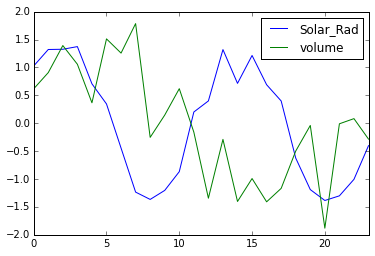

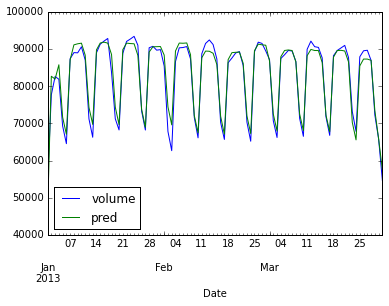

In [21]:

# Module imports
import pandas as pd
import numpy as np


# Read CSV
df = pd.read_csv('power_train.csv')

# Read Excel
xl_file = pd.ExcelFile('weather.xlsx')
dfw = xl_file.parse(xl_file.sheet_names[0])#.set_index('Date') 

# Set date as index
df.index = pd.to_datetime(df.Date)
dfw.index = pd.to_datetime(dfw.Date)

# Merge datasets
df = pd.merge(df, dfw[dfw.columns-['Date']], left_index = True, right_index = True, how = 'inner')

# Resmaple by month
temp = df.resample('1M')

from sklearn import preprocessing as pp
scaler = pp.StandardScaler().fit(temp)
temp = pd.DataFrame(scaler.transform(temp),columns=temp.columns)
temp[['Solar_Rad','volume']].plot()


# Generate date related attributes
df['month'] = df.index.map(lambda x: x.month)
df['dow'] = df.index.map(lambda x: x.dayofweek)
df['doy'] = df.index.map(lambda x: x.dayofyear)
df['day'] = df.index.map(lambda x: x.day)
df['woy'] = df.index.map(lambda x: x.weekofyear)
df['yr'] = df.index.map(lambda x: x.year)

i = 'yr'
df[[i,'volume']].groupby([i]).mean()#.plot()



''' Hiányzó értékek kezelése '''
#Hiányzó célváltozójú sorok eldobása
df = df[df.volume.notnull()]


#Hiányzó értékek pótlása
df['winter'] = df.winter.ffill()
df['Solar_Rad'] = df.Solar_Rad.interpolate()
df['Precip_Amt'] = df.Precip_Amt.fillna(0)

# Recode nominal
df['cday_type'] = pd.Categorical(df.day_type).codes

for i in df.day_type.unique():
    df['day_'+i.lower()] = df.day_type.apply(lambda x: (x==i)+0)
    
# Data engineering
df['pday_type'] = df.day_type.shift().fillna(99) 
df['nday_type'] = df.day_type.shift(-1).fillna(99)

for i in df.pday_type.unique():
    df['pday_'+str(i).lower()] = df.pday_type.apply(lambda x: (x==i)+0)

for i in df.nday_type.unique():
    df['nday_'+str(i).lower()] = df.nday_type.apply(lambda x: (x==i)+0)
    
del df['cday_type']
del df['pday_type']
del df['nday_type']
del df['day_type']
del df['Date']


# Kapcsolat a célváltozóval
df.corr()['volume']

# Validating intervals   

''' Train - test szétvágása '''
start = '2013-01-01'

d = df[df['yr']!=2011]
train = d[d.index < start]
# Define validation set
val   = d[start:]

y = val.volume

from sklearn import linear_model, metrics, ensemble, grid_search

''' Lineáris regresszió tanítása '''
regr = linear_model.LinearRegression()
#regr = ensemble.GradientBoostingRegressor()
regr = regr.fit(train[train.columns-['volume']], train.volume)
p = regr.predict(val[val.columns-['volume']])

metrics.mean_squared_error(y,p)
metrics.mean_absolute_error(y,p)


# Normalized Mean Absolute Error
mape  = lambda x, y: np.abs((y-x)/y).mean()
out = mape(y,p)*100
print out

val['pred'] = p
val[['volume','pred']].plot()

''' Paraméter optimalizáció grid bejárással ''' 
param_grid = [{
                'fit_intercept': [True, False],
                'normalize': [True, False]
                }]
                    

gs = grid_search.GridSearchCV(regr, param_grid=param_grid, cv=3, verbose=5, scoring='mean_squared_error')
gs.fit(train[train.columns-['volume']], train.volume)
print gs.best_params_, abs(gs.best_score_)

regr2 = linear_model.LinearRegression(fit_intercept=False, normalize=True)
#regr.__init__(fit_intercept=False, normalize=True)
val2   = d[start:]
regr2 = regr2.fit(train[train.columns-['volume']], train.volume)
p2 = regr2.predict(val2[val2.columns-['volume']])

mape  = lambda x, y: np.abs((y-x)/y).mean()
out = mape(y,p)*100
print "Legjobb beállítás mellett ez az eredmény:"
print out


In [23]:
df.corr()['volume']



school_holiday   -0.324800
winter            0.007232
volume            1.000000
Precip_Amt       -0.062326
Solar_Rad        -0.004901
Temp              0.047865
Wind_Speed        0.036364
month            -0.014339
dow              -0.631710
doy              -0.019677
day              -0.053136
woy              -0.012792
yr               -0.198692
day_we            0.886720
day_sa           -0.407014
day_su           -0.603982
day_gf           -0.043656
day_em           -0.074102
day_m1           -0.054848
day_m2           -0.096029
day_a2           -0.061480
day_sd           -0.148709
day_cd           -0.176854
day_bd           -0.140541
day_j1           -0.146288
pday_99           0.040364
pday_we           0.446871
pday_sa          -0.610471
pday_su           0.136949
pday_gf          -0.088854
pday_em          -0.017249
pday_m1           0.025180
pday_m2          -0.049979
pday_a2           0.002980
pday_sd          -0.187232
pday_cd          -0.140541
pday_bd          -0.095292
p

In [25]:
regr2.coef_

array([ -3.39147475e+00,  -4.78323810e-01,  -7.19800969e+01,
        -1.34622091e+00,  -6.20602016e+02,   1.76671075e+03,
        -3.40183943e+03,  -5.42460241e+03,  -3.29930849e+03,
         5.72846309e+03,  -1.55696132e+04,  -1.00272209e+03,
         1.40352197e+03,  -1.26138188e+03,   9.84989800e+03,
        -5.10711738e+03,   1.63180113e+04,  -4.89423516e+01,
         6.14916835e+02,  -1.85920165e+04,  -1.96488614e-12,
         6.97941408e+03,  -5.42460241e+03,  -1.15812122e+04,
        -1.64568162e+03,   5.46119037e+03,  -1.55660305e+04,
         3.76530931e+03,   2.40924344e+03,   2.65066585e+03,
         1.07168573e+03,   6.18349722e+03,   5.69654100e+03,
        -4.01864173e-12,   5.15909062e+02,  -5.95902648e+03,
        -3.40183943e+03,  -6.06378784e+03,   6.69813053e+02,
         4.84400928e+03,   1.90137867e+03,  -2.47626324e+03,
         4.45517588e+03,  -2.14768636e+03,   2.90601067e+03,
         4.75632697e+03,  -2.27202735e+03,   2.02373923e+03,
        -9.14472069e+01,

In [26]:
val2.columns

Index([u'school_holiday',         u'winter',         u'volume',
           u'Precip_Amt',      u'Solar_Rad',           u'Temp',
           u'Wind_Speed',          u'month',            u'dow',
                  u'doy',            u'day',            u'woy',
                   u'yr',         u'day_we',         u'day_sa',
               u'day_su',         u'day_gf',         u'day_em',
               u'day_m1',         u'day_m2',         u'day_a2',
               u'day_sd',         u'day_cd',         u'day_bd',
               u'day_j1',        u'pday_99',        u'pday_we',
              u'pday_sa',        u'pday_su',        u'pday_gf',
              u'pday_em',        u'pday_m1',        u'pday_m2',
              u'pday_a2',        u'pday_sd',        u'pday_cd',
              u'pday_bd',        u'pday_j1',        u'nday_sa',
              u'nday_su',        u'nday_we',        u'nday_gf',
              u'nday_em',        u'nday_m1',        u'nday_m2',
              u'nday_a2',        u'nday_

In [27]:
regr2.intercept_

0.0